# MSDM5051 Tutorial 1 - Linear Data Structure & Recursion

## Contents 

1. Data structures for collection of objects
2. Recursion

---
# 1. Data structures for collection of objects

In the lecture Professor have mentioned many data structures for storing a collection of objects:

- **Linear collection** - Each object is at most connected to two other objects - the "previous" and the "next". E.g. array, linked list, stack, queue, etc.

- **Non-linear collection** - Each object can be connected to a collection of objects and does not have to come one after another. E.g. tree, graph, etc.

Understanding the pro and cons of each of the data structure is fundamental to design effcient algorithms in object-oriented programming. We will focus on linear collection this week.

## 1.1. A somewhat simplified summary

(You should be familiar with these data structues if you have attended to any introductory algorithm class using OOP language like C++ or Java.)

- **Array** - A sequence of data stored in a continuous section of the computer's physical memory. 
    - The connection of data is in the order of index / physical memory address. So 
        - Accessing elements is instant if the index is known.
        - Insertion/deletion are slow, since one need to shift the index of all subsequent data if a data is insert or delete in the middle of the array.
        - In fact, operations that change the length of the array is memory inefficient since the only way to maintain the data as a continuous piece is by copying the altered array to a new memory location.
    - The simplest structure for storing a collection of data, without the need of OOP.


- **Linked-list** - A sequence of data with each entry stored as an individual object (i.e. node).
    - Each data/node does not need to be stored in an organized order in the computer's memory.
    - The connection of data/nodes are pointer based. i.e. Every data/object contains an extra piece of info, telling the address of its neighbour data/objects in the computer's physical memory. So
        - Insertion/deletion are fast, since they only involve changing the address of the neighbour of the inserted/deleted data.
        - Accessing elements is slow, since the data/nodes do not carry the info of their order in the list.
    - Is actually a big family, members included:
        - Singly linked list
        - Doubly linked list
        - Circular list
        - Skip list
        
        ... and many more.


- **Stack** - Essentially a linked list, but insertion/deletion follow the Last In First Out (LIFO) rule. i.e. restricted to the last element only (so called "push" and "pop").

- **Queue** - Essentially a linked list, but insertion/deletion follow the First In First Out (FIFO) rule. i.e. insert is restricted to the last and delete is restricted to the first element. They are also called "push" and "pop", but you may see them being called "enqueue" and "dequeue".

- **Hash Table** (e.g. `unordered_map` in C++) - A structure storing data in the form of key-value pairs. 
    - Consists of a list for storing the keys, pairing up with a list of allocated memory for storing the values. 
    - The keys must be unique and are usually sorted in the list, so 
        - Checking if the key is in the keys' list depends on what the data structure of the sorted list is.
        - Insertion/deletion also depends on what the data structure of the sorted list is, since you have to reorder the list of keys.
    - Key & value are connected by hashing, i.e. Applying the hash function to a key will return the index of its corresponding value in the values' list.
        - Checking if the value is in the values' list / assigning a value to a key, are instant, if the key is known.

<figure style="text-align: center">
  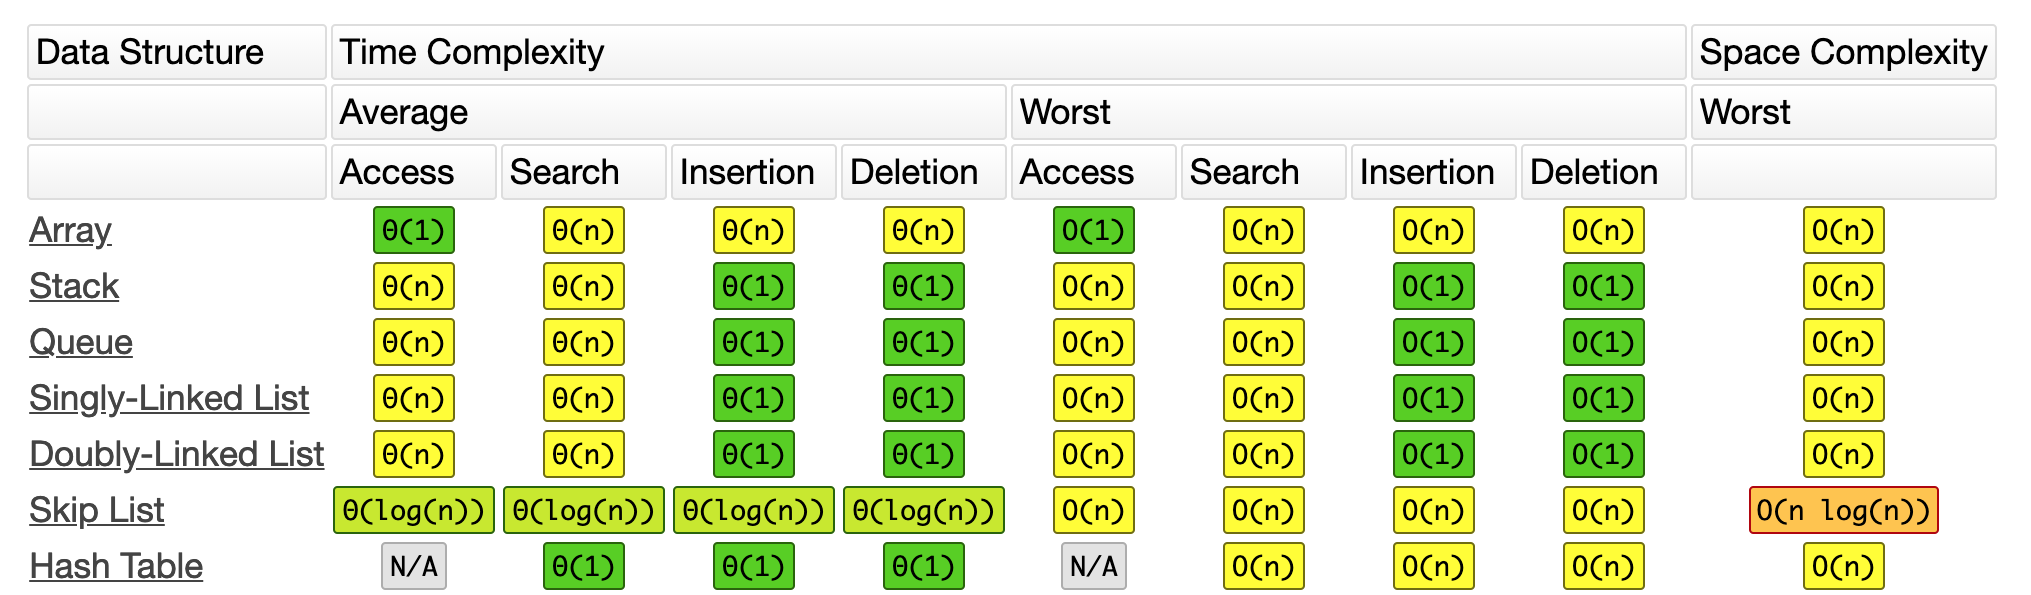
    <figcaption> <b>Fig. 1</b> Complexity chart of operations on linear data structures. Retrieved from <a href="https://www.bigocheatsheet.com/">https://www.bigocheatsheet.com/</a>.</figcaption>
</figure>

## 1.2. Implementation in Python

In Python, a higher level language, basically everything is coded internally as objects. In most cases, you don't have to code the data structure on your own (or even understand how the algorithms run in the background) unless you are looking for full control. 

### 1.2.1. Array-like structures
These are the array-like structures available in vanilla Python:

- **List** - It is stored in computer's memory like ordinary array, but added methods like `.append()` and `.pop()` so that you can use it *like* a stack or queue. Yet its operations' efficiency are the same as array. 

In [ ]:
my_list = [True, "I love Python", 5051]

- **`collections.deque`** - A special doubly-linked list, provided by the Python standard library `collections`, that is particularly optimized for inserting/deleting elements at both ends of the list, but not elements in the middle of the list.

In [ ]:
from collections import deque
my_queue = deque([True, "I love Python", 5051])

Also worth mentioning - Numpy array, although not a vanilla data type in Python, will probably be the most frequent type you use in other courses. 

- **Numpy array** - They are stored in computer's memory like ordinary array, however in an optimized way that requires less memory and for carrying out faster elementwise operations. You should always declare a list as a Numpy array if you are doing numerical computation with Numpy.

In [ ]:
import numpy as np
my_npArray = np.array([5003, 5051, 5056])

Bear in mind that _**in vanilla Python, there is no structure specfically corresponds to a linked list.**_ You must code it yourself if you want to use one. For example:

In [ ]:
class Node:
    def __init__(self, data, next_node=None):
        self.data = data
        self.next = next_node
        
class SinglyLinkedList:
    def __init__(self, head=None):
        self.head = head
        
    # you need to create a method for printing the list
    def print_list(self):
        print_node = self.head
        while print_node is not None:
            print(print_node.data)
            print_node = print_node.next

#####################################################            
# create the linked list and node objects
my_SLL = SinglyLinkedList()
n1 = Node(True)
n2 = Node("I love Python")
n3 = Node(5051)

# Linking by direct assigning the nodes' property
my_SLL.head = n1
n1.next = n2
n2.next = n3

# print the list 
my_SLL.print_list()

### 1.2.2. Other built-in data structures

Other than list, Python provides others kind of data structures that can come handy in different scenarios.

#### Structures for sequential data:

Prefered if the order of data is important. List also belongs to this category.
- **Tuple** - Same as a list except that its content cannot be changed after it is declared. 
- **Range** - Just like a tuple but its content must be a sequence of number. 
- **String** - Just like a tuple but its content would be interpreted as texts (~ `char` type in C).

In [ ]:
my_tuple = (True, "I love Python", 5051)
my_range = range(1,5051, -1)
my_string = "I love Python"

#### Structures for non-sequential data:

Structures that are highly optimized for checking if a specific item is in the data.

- **Dictionary** - Similar to a hash table.
- **Set** - Similar to a dictionary, except that the entries in the values' table can only be true or false (i.e. key is created or not). 

In [ ]:
my_dict = {"attendance": True, "opinion": "I love Python", "course": 5051}
my_set = {True, "I love Python", 5051}

To learn more, you may read the documentation of Python on [data structures](https://docs.python.org/3/tutorial/datastructures.html) and [built-in data types](https://docs.python.org/3/library/stdtypes.html). 

---
# 2. Recursion

Recursion is another approach to perform the same tasks over and over, other than using iteration. Compare with iteration, writing as recursion is advantageous in generating new elements from a infinite set, and also testing if an element belongs to a very large set.

## 2.1. Recursive definition

A good start to write a recursive function is to first write out a recursive definition of the operation you want to create. For example, the recursive definition of computing factorial of a number can be written as:

$$
n! = f(n) = 
\begin{cases} 
1 & \text{if }n = 0 \\
n\cdot f(n-1) & \text{if } n>0
\end{cases}
$$

In a well-written definition, you should always find these two elements:
- **Anchor** = the stopping condition. E.g. the $n=0$ case above.
- **Inductive steps** =  the steps to generate the next operation. E.g. the $n>0$ case above.

Translation into codes becomes straightfoward after obtaining such definition. It can be written via either of these patterns:

1. The `while` loop pattern:

    ```
    <function>: 
        while NOT <stopping condition>:
            <inductive step>
        return <output of stopping condition>
    ```


2. The `if` clause pattern:

    ```
    <function>:
        if NOT <stopping condition>:
            <inductive step>
        return <output of stopping condition>
    ```


3. The `if-else` clause pattern:

    ```
    <function>:
        if <stopping condition>:
            return <output of stopping condition>
        else:
            <inductive step>
    ```
    
Note that variations of these patterns exist, and there is no general rules of which pattern you must use in certain scenarios. You should always practice more in order to master the skill of writing recursion.

In [ ]:
# The while pattern
def factorial_while(n):
    while n != 0:
        return n*factorial_while(n-1)
    return 1

# The if pattern
def factorial_if(n):
    if n != 0:
        return n*factorial_if(n-1)
    return 1

# The if-else pattern
def factorial_elif(n):
    if n == 0:
        return 1
    else:
        return n*factorial_elif(n-1)

## 2.2. Practice on recursion

### 2.2.1. Fibonacci sequence

The Fibonacci sequence can be generated by the definition:

$$
\text{Fib}(n) =
\begin{cases}
1 & \text{if }n=0 \text{ or } 1\\
\text{Fib}(n-1) + \text{Fib}(n-2) & \text{if }n\geq 2
\end{cases}
$$

Try to translate it into a recursive function. Efficiency does not matter. 

In [ ]:
# Try it by yourself!



### 2.2.2. Reverting a linked list with recursion

Given the definition of a linked list and its nodes as follow. Try to write out a recursive function that can rewrite the linked list. You may first begin with writting it out as a recursive definition. 

In [ ]:
class Node:
    def __init__(self, data, next_node=None):
        self.data = data
        self.next = next_node  

class SinglyLinkedList:
    def __init__(self, head=None):
        self.head = head
        
    def print_list(self):
        print_node = self.head
        while print_node is not None:
            print(print_node.data)
            print_node = print_node.next    

    ##############################################################################################
    # Finish the reverse() function. 
    # Note that you can define other functions to be used inside reverse() as well
    
    def reverse(self):
        
        
    ##############################################################################################    

In [ ]:
# For your testing

my_SLL = SinglyLinkedList()
n1 = Node(True)
n2 = Node("I love Python")
n3 = Node(5051)

# Linking by direct assigning the nodes' property
my_SLL.head = n1
n1.next = n2
n2.next = n3

# print the reversed list 
my_SLL.reverse()
my_SLL.print_list()

You may also check out these related exercises and alternative solutions on LeetCode:

- [Problem 206 - Reverse Linked List](https://leetcode.com/problems/reverse-linked-list/)
- [Problem 92 - Reverse Linked List II](https://leetcode.com/problems/reverse-linked-list-ii/)